# IMPORTS AND FUNCTIONS

In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import seaborn as sns
import pandas as pd



c:\Users\larar\anaconda3\envs\deeplearning2024\Lib\site-packages\onnxruntime\capi\onnxruntime_validation.py:26: UserWarning: Unsupported Windows version (11). ONNX Runtime supports Windows 10 and above, only.
  warnings.warn(


In [2]:
from functions_preprocessing import combine_image_folders, erase_double_images, train_test

import functions_validation as v

import functions_licenseplate as fl

import functions_recognition as r

import SVC as svc

import CNN as cnn

import API_car_model as api

# PREPROCESSING DATA

In [17]:

"""source_folders = [
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS MERI",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS LARA",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Frontal",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Lateral"
]

destination_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'
combine_image_folders(source_folders, destination_folder) #ALREADY CREATED"""


Folder created: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES


In [18]:

"""folder_path = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'
erase_double_images(folder_path)"""

Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\8970GZR (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\7122FYJ (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\2748LKK (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\0085LND (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\1139LJX (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\2375KFD (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\4634JKH (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\4346HMW (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\8033MLP (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\4812GTX (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\3214LCL (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\7911LYX (1).jpg
Deleted: G:/Mi u

In [19]:
"""source_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'  
train_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'    
test_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset'     
val_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset'
# Call the train_test function to perform the split
train_test(source_folder, train_folder, test_folder, val_folder)"""


Data split complete: 144 training files, 72 testing files, 24 validation files.


# DETECTION LICENSE PLATE

## CROPPING USING YOLO

In [7]:
"""image_folder_2 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'
cropped_plates_train_2 = fl.boundingbox(image_folder_2)#dictionary name plate (sequence) + croppedd image
image_folder_3 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset'
cropped_plates_train_3 = fl.boundingbox(image_folder_3)#dictionary name plate (sequence) + croppedd image
image_folder_4 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset'
cropped_plates_train_4 = fl.boundingbox(image_folder_4)#dictionary name plate (sequence) + croppedd image"""

In [8]:
"""save_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'
fl.display_and_save_cropped_plates(cropped_plates_train_2, save_folder)
save_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset_croppedimages'
fl.display_and_save_cropped_plates(cropped_plates_train_3, save_folder)
save_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset_croppedimages'
fl.display_and_save_cropped_plates(cropped_plates_train_4, save_folder)"""

Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\1310MPK.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\6040DLX.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\2953JHW.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\8384KWN.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\5240KSW.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\6712KPR.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\6554BNX.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\1339MMS.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\9542KDC.jpg
Saved cropped plate to G:/Mi

# TRAINING MODELS (character detection)

## SVC MODEL 

In [3]:
base_path_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Dataset Characters'
accuracy, clf, scaler, label_encoder = svc.train_svm_and_get_accuracy(base_path_lara)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 87.21%


## CNN MODEL

In [4]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  
    transforms.Resize((28, 28)),                 
    transforms.ToTensor(),                        
    transforms.Normalize((0.5,), (0.5,))         
])

dataset = ImageFolder(root= base_path_lara, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#print(f"Classes: {dataset.classes}")

num_classes = len(dataset.classes)
model = cnn.CNNModel(num_classes)

criterion = cnn.nn.CrossEntropyLoss() 
optimizer = cnn.optim.Adam(model.parameters(), lr=0.001)

model.to(cnn.device)

cnn.train_model(model, train_loader, criterion, optimizer, num_epochs=30)
cnn.evaluate_model(model,test_loader)

Epoch [1/30], Loss: 3.567791700363159
Epoch [2/30], Loss: 3.2217656915838067
Epoch [3/30], Loss: 2.6013115644454956
Epoch [4/30], Loss: 1.6976417628201572
Epoch [5/30], Loss: 1.1486668315800754
Epoch [6/30], Loss: 0.7370937331156298
Epoch [7/30], Loss: 0.5076939571987499
Epoch [8/30], Loss: 0.29496600140224805
Epoch [9/30], Loss: 0.22657926617698235
Epoch [10/30], Loss: 0.1764775270765478
Epoch [11/30], Loss: 0.13025157864798198
Epoch [12/30], Loss: 0.10455228930169885
Epoch [13/30], Loss: 0.1041620077395981
Epoch [14/30], Loss: 0.11042351817542856
Epoch [15/30], Loss: 0.08562502171844244
Epoch [16/30], Loss: 0.051723278550939125
Epoch [17/30], Loss: 0.03149224948984655
Epoch [18/30], Loss: 0.03510911119255153
Epoch [19/30], Loss: 0.041666312122040174
Epoch [20/30], Loss: 0.04507654456591064
Epoch [21/30], Loss: 0.033383555128239095
Epoch [22/30], Loss: 0.04960223691622642
Epoch [23/30], Loss: 0.0366290811533955
Epoch [24/30], Loss: 0.040401718663898384
Epoch [25/30], Loss: 0.040380313

# RESULTS (own data)

## TRAINING RESULTS

In [ ]:
"""pc_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'
# Define directories for saving Spanish and non-Spanish results
spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Spain (TRAIN)"
non_spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Rest (TRAIN)"

predict_train_svc = []
predict_train_svc_filter = []
predict_train_cnn = []
predict_train_cnn_filter = []
predict_train_ocr = []
predict_train_ocr_filter = []

# Create directories if they don't exist
os.makedirs(spanish_dir, exist_ok=True)
os.makedirs(non_spanish_dir, exist_ok=True)

# Loop over the image files
for image_file in os.listdir(pc_lara):
        if image_file.endswith('.jpg'):  # Ensure we're processing image files only
            image_path = os.path.join(pc_lara, image_file)
            image = cv2.imread(image_path)
            car = image.copy()

            # SEGMENTATION CHARACTERS------------------------------------------
            # METHOD 1
            m1_chars = r.segment_characters(image)
            r.visualize_char(m1_chars)

            # METHOD 2
            upscaled_license_plate, m2_chars = r.OCR_image(
                license_plate=image, t=180, min_h=80, min_w=20, min_ar=0.2, max_ar=1.4, area=6000)

            # Choose the best method
            best_char = r.best_segmentation_method(m1_chars, m2_chars)

            #SAVE CHARACTERS IF WELL-SEGMENTED TO INCREASE THE DATASET (only trainset images)
            #for i in range(len(characters)):
            #save the files to expand the dataset
            #output_path = os.path.join("G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Dataset Characters", f'caracter_{i}.png')
            #cv2.imwrite(output_path, characters[i])
            
            # PREDICTION MODELS------------------------------------------
            plate_sol = svc.test_preprocessed_images_with_plot(clf, scaler, best_char, label_encoder)
            predict_train_svc.append(plate_sol)
            label_encoder = LabelEncoder()
            label_encoder.fit(dataset.classes)  
            predicted_plate = cnn.predict_characters(model, best_char, label_encoder)
            predict_train_cnn.append(predicted_plate)
            license_plate_text = r.easy_ocr_method(upscaled_license_plate)
            predict_train_ocr.append(license_plate_text)

            # Create the figure and axes for plotting
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
            
            
            # Filter for Spanish plates
            filter_plate_svc = r.filter_spain_plates(plate_sol)
            predict_train_svc_filter.append(filter_plate_svc)
            filter_plate_cnn = r.filter_spain_plates(predicted_plate)
            predict_train_cnn_filter.append(filter_plate_cnn)
            filter_plate_ocr = r.filter_spain_plates(license_plate_text)
            predict_train_ocr_filter.append(filter_plate_ocr)

            # Update titles to include filtered predictions
            axes[0].set_title(f"SVM Prediction: {plate_sol}\nFiltered: {filter_plate_svc}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}\nFiltered: {filter_plate_cnn}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}\nFiltered: {filter_plate_ocr}")

            save_dir = spanish_dir  # Save results in the Spanish folder

            # Plot the car image with the respective titles
            axes[0].imshow(car, cmap='gray')
            axes[0].axis('off')

            axes[1].imshow(car, cmap='gray')
            axes[1].axis('off')

            axes[2].imshow(car, cmap='gray')
            axes[2].axis('off')

            plt.tight_layout()

            # Save the image with a relevant name in the correct folder
            result_image_path = os.path.join(save_dir, f'{os.path.splitext(image_file)[0]}.png')
            plt.savefig(result_image_path)
            plt.close()
"""

## TEST RESULTS

In [ ]:
"""pc_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset_croppedimages'
spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Spain (TEST)"
non_spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Rest (TEST)"

predict_test_svc = []
predict_test_svc_filter = []
predict_test_cnn = []
predict_test_cnn_filter = []
predict_test_ocr = []
predict_test_ocr_filter = []

# Create directories if they don't exist
os.makedirs(spanish_dir, exist_ok=True)
os.makedirs(non_spanish_dir, exist_ok=True)

# Loop over the image files
for image_file in os.listdir(pc_lara):
    if image_file.endswith('.jpg'):  # Ensure we're processing image files only
        image_path = os.path.join(pc_lara, image_file)
        image = cv2.imread(image_path)
        car = image.copy()

        # SEGMENTATION CHARACTERS------------------------------------------
        # METHOD 1
        m1_chars = r.segment_characters(image)
        r.visualize_char(m1_chars)

        # METHOD 2
        upscaled_license_plate, m2_chars = r.OCR_image(
            license_plate=image, t=180, min_h=80, min_w=20, min_ar=0.2, max_ar=1.4, area=6000)

        # Choose the best method
        best_char = r.best_segmentation_method(m1_chars, m2_chars)

        # PREDICTION MODELS------------------------------------------
        plate_sol = svc.test_preprocessed_images_with_plot(clf, scaler, best_char, label_encoder)
        predict_test_svc.append(plate_sol)
        label_encoder = LabelEncoder()
        label_encoder.fit(dataset.classes)  
        predicted_plate = cnn.predict_characters(model, best_char, label_encoder)
        predict_test_cnn.append(predicted_plate)
        license_plate_text = r.easy_ocr_method(upscaled_license_plate)
        predict_test_ocr.append(license_plate_text)

        # Ask if the plate is Spanish
        spain = input("Is it a Spanish plate?: ")

        # Create the figure and axes for plotting
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
        
        if spain.upper() == "Y":
            # Filter for Spanish plates
            filter_plate_svc = r.filter_spain_plates(plate_sol)
            predict_test_svc_filter.append(filter_plate_svc)
            filter_plate_cnn = r.filter_spain_plates(predicted_plate)
            predict_test_cnn_filter.append(filter_plate_cnn)
            filter_plate_ocr = r.filter_spain_plates(license_plate_text)
            predict_test_ocr_filter.append(filter_plate_ocr)

            # Update titles to include filtered predictions
            axes[0].set_title(f"SVM Prediction: {plate_sol}\nFiltered: {filter_plate_svc}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}\nFiltered: {filter_plate_cnn}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}\nFiltered: {filter_plate_ocr}")

            save_dir = spanish_dir  # Save results in the Spanish folder

        else:
            # No filtering for non-Spanish plates
            axes[0].set_title(f"SVM Prediction: {plate_sol}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}")

            save_dir = non_spanish_dir  # Save results in the non-Spanish folder

        # Plot the car image with the respective titles
        axes[0].imshow(car, cmap='gray')
        axes[0].axis('off')

        axes[1].imshow(car, cmap='gray')
        axes[1].axis('off')

        axes[2].imshow(car, cmap='gray')
        axes[2].axis('off')

        plt.tight_layout()

        # Save the image with a relevant name in the correct folder
        result_image_path = os.path.join(save_dir, f'{os.path.splitext(image_file)[0]}.png')
        plt.savefig(result_image_path)
        plt.close()
"""

## VALIDATION RESULTS

In [ ]:
"""pc_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset_croppedimages'
spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Spain (VALIDATION)"
non_spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Rest (VALIDATION)"

predict_validation_svc = []
predict_validation_svc_filter = []
predict_validation_cnn = []
predict_validation_cnn_filter = []
predict_validation_ocr = []
predict_validation_ocr_filter = []

# Create directories if they don't exist
os.makedirs(spanish_dir, exist_ok=True)
os.makedirs(non_spanish_dir, exist_ok=True)

# Loop over the image files
for image_file in os.listdir(pc_lara):
    if image_file.endswith('.jpg'):  # Ensure we're processing image files only
        image_path = os.path.join(pc_lara, image_file)
        image = cv2.imread(image_path)
        car = image.copy()

        # SEGMENTATION CHARACTERS------------------------------------------
        # METHOD 1
        m1_chars = r.segment_characters(image)
        r.visualize_char(m1_chars)

        # METHOD 2
        upscaled_license_plate, m2_chars = r.OCR_image(
            license_plate=image, t=180, min_h=80, min_w=20, min_ar=0.2, max_ar=1.4, area=6000)

        # Choose the best method
        best_char = r.best_segmentation_method(m1_chars, m2_chars)

        # PREDICTION MODELS------------------------------------------
        plate_sol = svc.test_preprocessed_images_with_plot(clf, scaler, best_char, label_encoder)
        predict_validation_svc.append(plate_sol)
        label_encoder = LabelEncoder()
        label_encoder.fit(dataset.classes)  
        predicted_plate = cnn.predict_characters(model, best_char, label_encoder)
        predict_validation_cnn.append(predicted_plate)
        license_plate_text = r.easy_ocr_method(upscaled_license_plate)
        predict_validation_ocr.append(license_plate_text)

        # Ask if the plate is Spanish
        spain = input("Is it a Spanish plate?: ")

        # Create the figure and axes for plotting
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
        
        if spain.upper() == "Y":
            # Filter for Spanish plates
            filter_plate_svc = r.filter_spain_plates(plate_sol)
            predict_validation_svc_filter.append(filter_plate_svc)
            filter_plate_cnn = r.filter_spain_plates(predicted_plate)
            predict_validation_cnn_filter.append(filter_plate_cnn)
            filter_plate_ocr = r.filter_spain_plates(license_plate_text)
            predict_validation_ocr_filter.append(filter_plate_ocr)

            # Update titles to include filtered predictions
            axes[0].set_title(f"SVM Prediction: {plate_sol}\nFiltered: {filter_plate_svc}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}\nFiltered: {filter_plate_cnn}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}\nFiltered: {filter_plate_ocr}")

            save_dir = spanish_dir  # Save results in the Spanish folder

        else:
            # No filtering for non-Spanish plates
            axes[0].set_title(f"SVM Prediction: {plate_sol}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}")

            save_dir = non_spanish_dir  # Save results in the non-Spanish folder

        # Plot the car image with the respective titles
        axes[0].imshow(car, cmap='gray')
        axes[0].axis('off')

        axes[1].imshow(car, cmap='gray')
        axes[1].axis('off')

        axes[2].imshow(car, cmap='gray')
        axes[2].axis('off')

        plt.tight_layout()

        # Save the image with a relevant name in the correct folder
        result_image_path = os.path.join(save_dir, f'{os.path.splitext(image_file)[0]}.png')
        plt.savefig(result_image_path)
        plt.close()
"""

#### SAVE LIST OF OUTPUTS

In [13]:
"""# Function to save lists to txt file
def save_list_to_txt(list_data, file_path):
    with open(file_path, 'w') as f:
        for item in list_data:
            f.write(f"{item}\n")  

svc_predictions_path_validation = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_predictions_validation.txt"
cnn_predictions_path_validation = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_predictions_validation.txt"
ocr_predictions_path_validation = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_predictions_validation.txt"

svc_filtered_path_validation = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_filtered_validation.txt"
cnn_filtered_path_validation = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_filtered_validation.txt"
ocr_filtered_path_validation = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_filtered_validation.txt"

save_list_to_txt(predict_validation_svc, svc_predictions_path_validation)
save_list_to_txt(predict_validation_cnn, cnn_predictions_path_validation)
save_list_to_txt(predict_validation_ocr, ocr_predictions_path_validation)

# Guardar predicciones filtradas para placas españolas
save_list_to_txt(predict_validation_svc_filter, svc_filtered_path_validation)
save_list_to_txt(predict_validation_cnn_filter, cnn_filtered_path_validation)
save_list_to_txt(predict_validation_ocr_filter, ocr_filtered_path_validation)"""

# EVALUATING MODELS

## Training

2953J7J
83YD8NC
5554??4
9542KDC
1107JND
1824KYK
4283DJP
16000GV
6011HHY
695326V
2344KJP
7746KBG
9331CRK
LE -030
?4900KP
7?9JH?L
1667BTS
4346HMW
4674FHC
7067K3H
2031JPF
?7??E -
1681LJT
8146JHT
9892JFP
7911L?X
D6098HM
612D6LL
2377775
?5052?H
5133MBD
6963HK3
96003?0
0L31J6?
7M7E -E
TALLER1
23709FW
?7927HD
9408C7F
57759NF
?4789HN
0195JHM
3451L?8
6072H8J
5275HCY
7?KP?P0
5386MKJ
071?V8C
?8011KH
05934JW
01?2?LK
2929KYJ
4797L80
D129KMK
3362LKY
7016ML7
J?4080K
55?4HJL
5753CP?
1855MHN
?3247K7
6888LYP
D17903H
34978YY
5934GCY
5179LBS
5936LDW
74087?K
8033MLP
?E -639
82953J7
83YU8NC
16554SN
9542KDC
1107JND
1824KYK
4283DJR
16000GV
6011HHV
69532GV
2344KJP
77L6K8G
9331CRK
LE -030
44900KP
789JH8L
1667BTS
4346HMW
4674FHC
7067KSH
2031JPF
E39XE -
1681LJT
8146JHT
9892JFR
7911LYX
D6098HM
6120GLL
23II72I
H5052LH
5133MBD
6963HKS
960U3AD
80L11J6
MW7II87
TALLER1
822709F
41927HD
9408CZF
S7758NF
M4789HN
0195JHM
34S1L68
6072H8J
5275HGY
KKKVHYO
5386MKJ
011JV8C
L8011KH
0512KJW
0182GLK
2929KXJ
4797L80
0129KMK
3362LKY


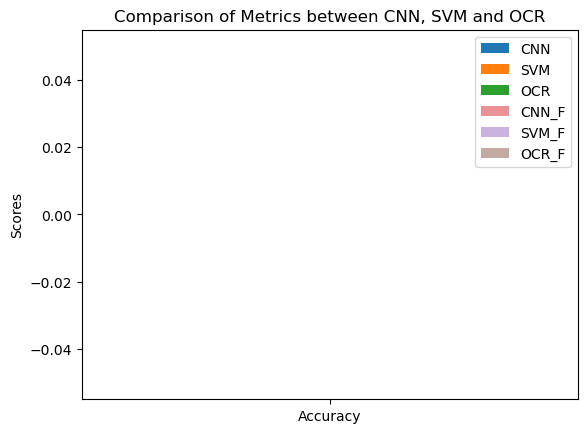

In [3]:
image_dir = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'  
svm_txt = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_predictions.txt'  
cnn_txt = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_predictions.txt' 
ocr_txt = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_predictions.txt'  
svm_txt_filter = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_filtered.txt'  
cnn_txt_filter = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_filtered.txt'  
ocr_txt_filter = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_filtered.txt'  

class_names = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
    'B', 'C', 'D', 'F', 'G', 'H', 'J', 
    'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 
    'V', 'W', 'X', 'Y', 'Z'
]

v.run_evaluation_with_filenames(image_dir, svm_txt, cnn_txt, ocr_txt, svm_txt_filter, cnn_txt_filter, ocr_txt_filter, class_names)

## Testing

In [ ]:
image_dir_test = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset_croppedimages'  
svm_txt_test = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_predictions_test.txt'  
cnn_txt_test = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_predictions_test.txt' 
ocr_txt_test = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_predictions_test.txt'  
svm_txt_filter_test = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_filtered_test.txt'  
cnn_txt_filter_test = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_filtered_test.txt'  
ocr_txt_filter_test = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_filtered_test.txt'  

v.run_evaluation_with_filenames(image_dir_test, svm_txt_test, cnn_txt_test, ocr_txt_test, svm_txt_filter_test, cnn_txt_filter_test, ocr_txt_filter_test, class_names)

## Validation

In [ ]:
image_dir_validation = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset_croppedimages'  
svm_txt_validation = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_predictions_validation.txt'  
cnn_txt_validation = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_predictions_validation.txt' 
ocr_txt_validation = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_predictions_validation.txt'  
svm_txt_filter_validation = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_filtered_validation.txt'  
cnn_txt_filter_validation = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_filtered_validation.txt'  
ocr_txt_filter_validation = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_filtered_validation.txt'  

v.run_evaluation_with_filenames(image_dir_validation, svm_txt_validation, cnn_txt_validation, ocr_txt_validation, svm_txt_validation, cnn_txt_filter_validation, ocr_txt_filter_validation, class_names)

## SVM EVALUATION

## OCR EVALUATION

## CONFUSION MATRIX

## COMPARATIVE ANALYSIS

In [ ]:
metrics_data = {
    'Model': ['SVM', 'CNN'],
    'Accuracy': [svm_accuracy, cnn_accuracy],
    'Precision': [svm_precision, cnn_precision],
    'Recall': [svm_recall, cnn_recall],
    'F1 Score': [svm_f1, cnn_f1]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

# Plot the comparative metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of SVM and CNN on License Plate Recognition")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.show()

# API PART

In [34]:
#api.api_car_model(predicted_plate)

STATE: 200
RESPONSE: <?xml version="1.0" encoding="utf-8"?><soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema"><soap:Body><CheckSpainResponse xmlns="http://regcheck.org.uk"><CheckSpainResult><vehicleJson>{
  "Description": "CITROEN C3",
  "CarMake": {
    "CurrentTextValue": "CITROEN"
  },
  "CarModel": {
    "CurrentTextValue": "C3"
  },
  "MakeDescription": {
    "CurrentTextValue": "CITROEN"
  },
  "ModelDescription": {
    "CurrentTextValue": "C3"
  },
  "EngineSize": "1199",
  "VehicleIdentificationNumber": null,
  "RegistrationYear": "2023",
  "RegistrationDate": "15/06/2023",
  "Variation": "1.2 PURETECH 83 FEEL",
  "Seats": null,
  "VariantType": "Gasolina 1199 cc 5 puertas",
  "VehicleType": "Car",
  "Fuel": "Gasolina",
  "IndicativePrice": null,
  "Doors": "5",
  "AllTerain": null,
  "KType": null,
  "ImageUrl": "http://matriculaapi.com/image.aspx/@Q0lUUk9FTiBD

# COUNTER CHARACTERS

In [6]:
path = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Dataset Characters"
output_file = "folder_counts.csv"
r.count_files_in_folders(path, output_file)

Data has been saved to folder_counts.csv
